# LIBRARIES


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# INISIASI DATASET


In [2]:
# import
SENTIMENT_DATASET_FILE_NAME = "ind-sentiment.csv"
SENTIMENT_DATASET_FILE_PATH = f"outputs/{SENTIMENT_DATASET_FILE_NAME}"
DATA_FRAME_SENTIMENT_DATASET = pd.read_csv(SENTIMENT_DATASET_FILE_PATH)
DATA_FRAME_SENTIMENT_DATASET_LENGTH = len(DATA_FRAME_SENTIMENT_DATASET)
print(f"sentiment dataset: {DATA_FRAME_SENTIMENT_DATASET_LENGTH} tweets")
display(DATA_FRAME_SENTIMENT_DATASET.tail(1))

sentiment dataset: 3239 tweets


,user_id,username,user_display_name,tweet_id,full_text,created_at,cleaned_text,after_slang_text,underscore_negation_text,swap_negation_text,is_different,after_stopwords_text,after_stemming_text,ind_preprocessed_text,inset_compound_score,inset_label
3238,1689531424054104064,arnold_sptr33,Arnold Saputra,1831181867472867445,@meraaahputiiih Pemindahan ibu kota mengilhami...,Wed Sep 04 04:05:53 +0000 2024,pemindahan ibu kota mengilhami kita untuk menj...,pemindahan ibu kota mengilhami kita untuk menj...,pemindahan ibu kota mengilhami kita untuk menj...,pemindahan ibu kota mengilhami kita untuk menj...,False,pemindahan kota mengilhami menjaga keanekaraga...,pindah kota ilham jaga keanekaragaman hayati,pindah kota ilham jaga keanekaragaman hayati,-0.2626,negatif


# TF-IDF


In [3]:
sentiment = DATA_FRAME_SENTIMENT_DATASET

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(sentiment["ind_preprocessed_text"])

feature_names = vectorizer.get_feature_names_out()

df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)
df_tfidf

,aa,aaa,aah,aasu,ab,aba,abad,abah,abai,abang,...,zaman,zarry,zer,zero,zionis,zionist,zombie,zona,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Chi Square


In [4]:
# Chi-Square feature selection
k_best_features = 1000  # Adjust the number of features you want to keep
selector = SelectKBest(chi2, k=k_best_features)
X_chi2 = selector.fit_transform(df_tfidf, sentiment["inset_label"])

# Get the selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_features = feature_names[selected_feature_indices]

# Display the selected features
print(f"Selected features: {selected_features}")

Selected features: ['abad' 'acara' 'ada' 'adik' 'adil' 'agam' 'agenda' 'agr' 'agustus'
 'ahmad' 'air' 'akademi' 'akan' 'alam' 'alas' 'alir' 'aliyah' 'allah'
 'alone' 'aman' 'amerika' 'amin' 'amp' 'anak' 'analogi' 'andai' 'anggi'
 'angk' 'angkat' 'anies' 'anjing' 'antarkementerian' 'antarwarga'
 'antarwilayah' 'anung' 'anything' 'apa' 'aparatur' 'api' 'argumentasi'
 'arif' 'armada' 'aroma' 'artis' 'as' 'asa' 'asia' 'asing' 'asli' 'asn'
 'asrama' 'assassin' 'atas' 'audit' 'aviv' 'aware' 'awas' 'baca' 'badan'
 'badmouth' 'bal' 'bambam' 'ban' 'bandara' 'bangetmudah' 'bangga'
 'bangkit' 'bangsa' 'bangun' 'banjarbaru' 'bappenas' 'barcelona' 'bareng'
 'batal' 'batik' 'batre' 'bau' 'bawa' 'beban' 'beckham' 'beda' 'begitu'
 'belanja' 'beli' 'beliau' 'belum' 'benar' 'benci' 'benefit' 'bengkulu'
 'bentuk' 'berangkat' 'beras' 'beribukota' 'berkat' 'bersykr' 'bhakti'
 'bhayangkari' 'bia' 'biar' 'biaya' 'bicara' 'bieb' 'bijak' 'bikin'
 'bilabgin' 'bilang' 'bin' 'bina' 'bincang' 'bisa' 'bismillah' 'b

# DATA SPLIT (90% TRAIN, 10% TEST)


In [5]:
# X_train,X_test,Y_train,Y_test=train_test_split(df_tfidf.values,sentiment["inset_label"],test_size=0.2,random_state=21)
X_train,X_test,Y_train,Y_test=train_test_split(X_chi2,sentiment["inset_label"],test_size=0.1,random_state=21)

# SMOTE


In [6]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=21)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

print(f"Original training set shape: {X_train.shape}, {Y_train.shape}")
print(f"Resampled training set shape: {X_train_resampled.shape}, {Y_train_resampled.shape}")

Original training set shape: (2915, 1000), (2915,)
Resampled training set shape: (6045, 1000), (6045,)


# KNN InSet


| k = 1 |
| accuracy: 0.8148148148148148 |
| precision: 0.8151230345712789 |
| recall: 0.8148148148148148 |
| f1: 0.8139463248244954 |


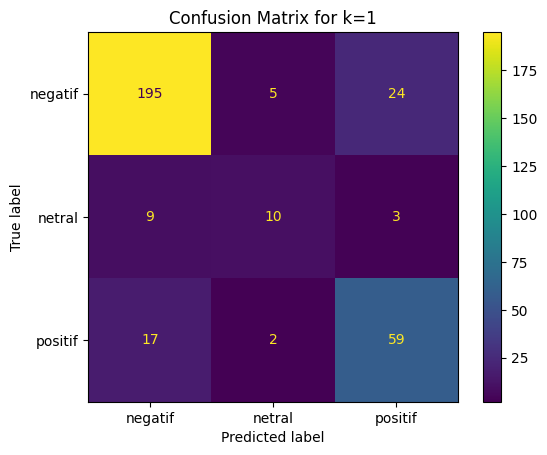

| k = 3 |
| accuracy: 0.8117283950617284 |
| precision: 0.8175096866432455 |
| recall: 0.8117283950617284 |
| f1: 0.8125194225499336 |


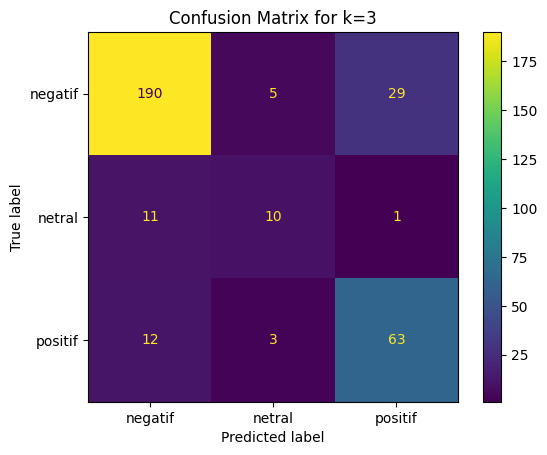

| k = 5 |
| accuracy: 0.7870370370370371 |
| precision: 0.8027023147217829 |
| recall: 0.7870370370370371 |
| f1: 0.7905599016889825 |


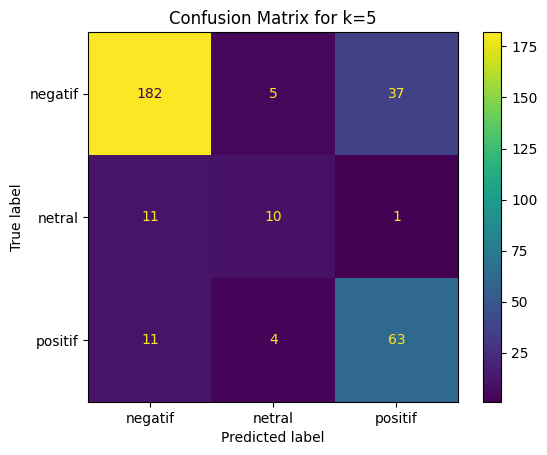

| k = 7 |
| accuracy: 0.7870370370370371 |
| precision: 0.8003770118562321 |
| recall: 0.7870370370370371 |
| f1: 0.7906222058160042 |


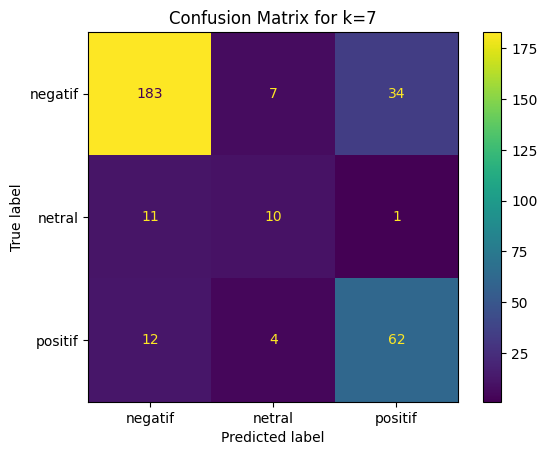

In [7]:
def train_evaluate_knn(k, X_train, Y_train, X_test, Y_test):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted')

    print(f"| k = {k} |")
    print(f"| accuracy: {accuracy} |")
    print(f"| precision: {precision} |")
    print(f"| recall: {recall} |")
    print(f"| f1: {f1} |")
    
    cm = confusion_matrix(Y_test, y_pred, labels=knn.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
    disp.plot()
    plt.title(f"Confusion Matrix for k={k}")
    plt.show()
    
    return knn


knn1 = train_evaluate_knn(1, X_train_resampled, Y_train_resampled, X_test, Y_test)
knn3 = train_evaluate_knn(3, X_train_resampled, Y_train_resampled, X_test, Y_test)
knn5 = train_evaluate_knn(5, X_train_resampled, Y_train_resampled, X_test, Y_test)
knn7 = train_evaluate_knn(7, X_train_resampled, Y_train_resampled, X_test, Y_test)

# DUMP KNN MODEL AND TF-IDF VECTORIZER


In [9]:
def save_model(model, filename):
    with open(filename, 'wb') as model_file:
            pickle.dump(model, model_file)

save_model(knn1, 'models/ind_inset_knn1_9010_model.pkl')
save_model(knn3, 'models/ind_inset_knn3_9010_model.pkl')
save_model(knn5, 'models/ind_inset_knn5_9010_model.pkl')
save_model(knn7, 'models/ind_inset_knn7_9010_model.pkl')
save_model(vectorizer, 'models/ind_vectorizer_model.pkl')
save_model(selector, 'models/ind_selector_model.pkl')